In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [ ]:
# Read the data
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check the dimensions of the data
data.shape

(10000, 14)

In [ ]:
# show the concise summary about data and count missing values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Descriptive statistical meaures
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

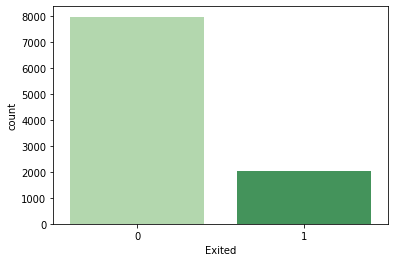

In [ ]:
#Diasplay the classes distribution in the data
sns.countplot(x = "Exited", data = data, palette = "Greens");
plt.show()

In [ ]:
# class count
class_count_0, class_count_1 = data['Exited'].value_counts()

# Separate class
class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (7963, 14)
class 1: (2037, 14)


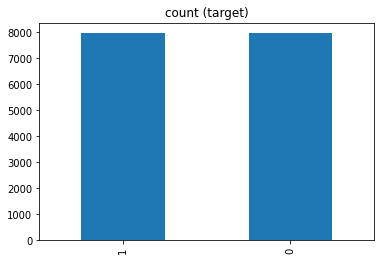

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

#print("total class of 1 and 0:",test_under['Exited'].value_counts())# plot the count after under-sampeling
test_over['Exited'].value_counts().plot(kind='bar', title='count (target)')

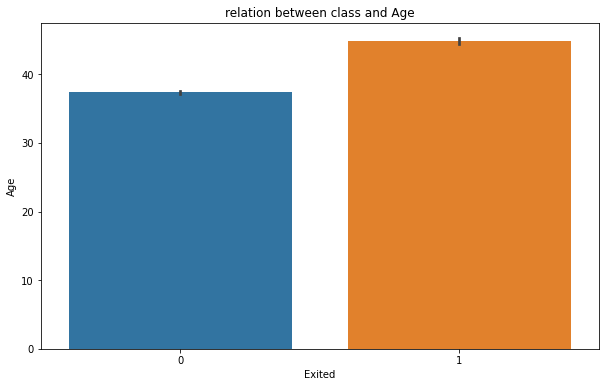

In [ ]:
# visualize ablilty level and raised Hand 
plt.figure(figsize=(10,6))
plt.title('relation between class and Age')
sns.barplot(x="Exited", y="Age", data=data)
plt.show()

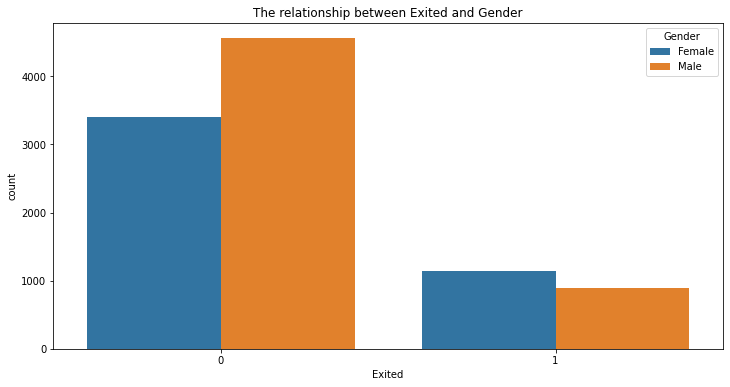

In [ ]:
plt.figure(figsize=(12,6))
plt.title('The relationship between Exited and Gender')
sns.countplot(x='Exited', hue = 'Gender', data=data)
plt.show()

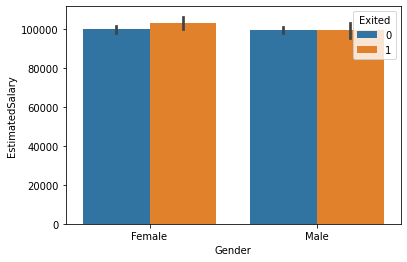

In [ ]:
sns.barplot(data=data, x="Gender", y="EstimatedSalary", hue="Exited")

In [ ]:
test_over["Gender"] = test_over["Gender"].astype('category')
test_over["Gender"] = test_over["Gender"].cat.codes
#data = data.Gender.astype(int)
test_over["Geography"] = test_over["Geography"].astype('category')
test_over["Geography"] = test_over["Geography"].cat.codes
#data = data.Geography.astype(int)
test_over.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6596,6597,15654531,Tuan,477,0,1,22,5,82559.42,2,0,0,163112.90,1
1376,1377,15587233,Donoghue,457,0,1,41,8,73700.12,3,1,1,185750.02,1
420,421,15810418,T'ang,756,1,0,60,3,115924.89,1,1,0,93524.19,1
2872,2873,15671591,Castiglione,439,2,1,52,3,96196.24,4,1,0,198874.52,1
2568,2569,15775905,Moore,612,1,0,47,6,130024.87,1,1,1,45750.21,1


In [ ]:
data1 = test_over.drop(['Surname'], axis=1)
data1['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 6596 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        15926 non-null  int64  
 1   CustomerId       15926 non-null  int64  
 2   CreditScore      15926 non-null  int64  
 3   Geography        15926 non-null  int8   
 4   Gender           15926 non-null  int8   
 5   Age              15926 non-null  int64  
 6   Tenure           15926 non-null  int64  
 7   Balance          15926 non-null  float64
 8   NumOfProducts    15926 non-null  int64  
 9   HasCrCard        15926 non-null  int64  
 10  IsActiveMember   15926 non-null  int64  
 11  EstimatedSalary  15926 non-null  float64
 12  Exited           15926 non-null  int64  
dtypes: float64(2), int64(9), int8(2)
memory usage: 1.5 MB


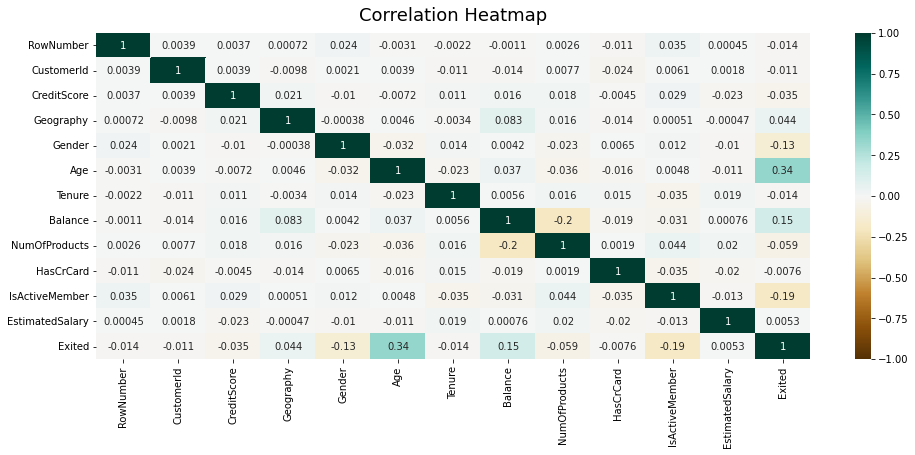

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [ ]:
# Shuffle your dataset 
shuffle_df = data1.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(data1))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [ ]:
X_train = train_set.drop(['Exited','RowNumber','CustomerId','Geography'], axis=1)

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
y_train=train_set.iloc[:,-1]
y_train = y_train.to_numpy()
y_train.shape

(11148,)

In [ ]:
X_test = test_set.drop(['Exited','RowNumber','CustomerId','Geography'], axis=1)


In [ ]:
X_test = X_test.to_numpy()
X_test.shape

(4778, 9)

In [ ]:
y_test=test_set.iloc[:,-1]
y_test = y_test.to_numpy()

In [ ]:
cmap_bold = ListedColormap(["#FF0000","#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB", "#BBBBFF"])

In [ ]:
def sigmoid(H):
  return 1/(1+np.exp(-H))
  
def ReLU(H):
  return H*(H>0)

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)


def cross_entropy(Y,P_hat):
  return -np.sum(Y*np.log(P_hat))


def one_hot_encoder(y):
  N = len(y)
  K = len(set(y))

  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]] = 1

  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
class ANN():
    
    def fit(self, X, y, neurons=10, eta = 1e-3, epochs = 1e3, show_curve = False):
        epochs = int(epochs)
        Y = one_hot_encoder(y)
        
        N,D = X.shape
        K = Y.shape[1]
        
        J = np.zeros(epochs)
        
        self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D, neurons], [neurons, K]), 1)}
        self.b = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
        
        ##establish activation
        self.a = {1: np.tanh, 2:sigmoid} ##chose activation functions for layers
        
        
        for epoch in range(epochs):
            self.forward(X)
            
            P_hat = self.Z[2]
            
            J[epoch] = cross_entropy(Y, P_hat)
            
            self.W[2] -= eta*(1/N)*self.Z[1].T@(P_hat-Y)
            self.b[2] -= eta*(1/N)*(P_hat-Y).sum(axis=0)
            
            self.W[1] -= eta*(1/N)*X.T@((P_hat-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.b[1] -= eta*(1/N)*((P_hat-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
            
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel('$\mathcal{J}$')
            plt.title('Training Curve')
            plt.show()
        
    def forward(self, X):
        self.Z = {0:X}

        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.b[l])
                
    
    def predict(self, X):
        self.forward(X)
        return self.Z[2].argmax(axis=1) ##without argmax Z[2] will give P_hat



In [ ]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

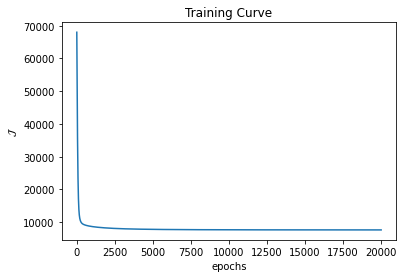

In [ ]:

ann = ANN()
ann.fit(X_train, y_train, neurons = 20, eta = 1e-2, epochs = 2e4, show_curve = True)
y_hat = ann.predict(X_train) 


In [ ]:
set(y_hat)

{0, 1}

In [ ]:
print(f"Training Accuracy: {accuracy(y_train, y_hat):0.4f}")

Training Accuracy: 0.5610


In [ ]:
y_hat1 = ann.predict(X_test)
set(y_hat1)

{0, 1}

In [ ]:
print(f"Test Accuracy: {accuracy(y_test, y_hat1):0.4f}")

Test Accuracy: 0.5592


Text(0.5, 15.0, 'Predicted label')

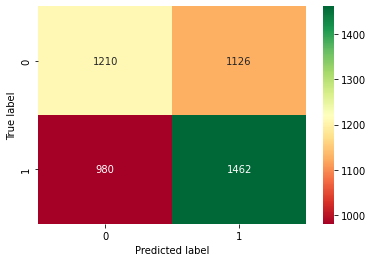

In [ ]:

y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat1, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, cmap = 'RdYlGn', fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')